<a href="https://colab.research.google.com/github/vishnujith07/automobilempg/blob/main/Automobile_MPG_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns    #plot the graph of the data set
import matplotlib.pyplot as plt   # for the graph plotting (shows the relationship between the datas)
import os
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # split the data set in to the train and the test data

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#importing the Necessary dependencies 
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics  # transforming the data in to the metrics

In [ ]:
#reading the CVS file using pandas as pd
data = pd.read_csv('auto-mpg.csv')

In [ ]:
data.head(400)  # head is used to print number of columns

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


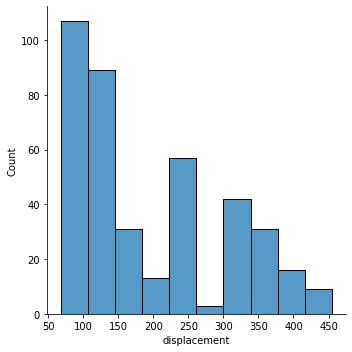

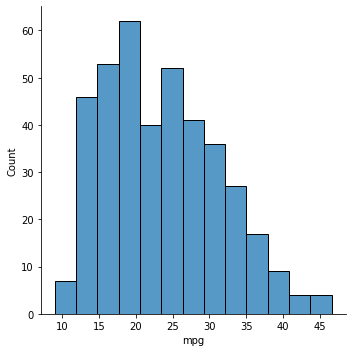

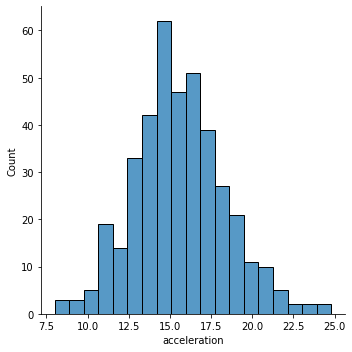

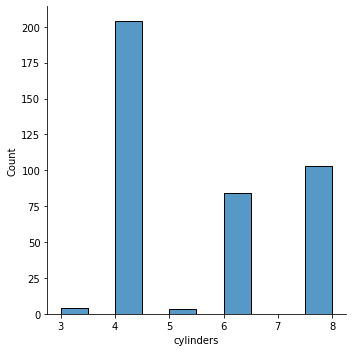

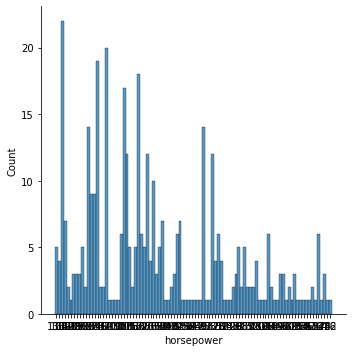

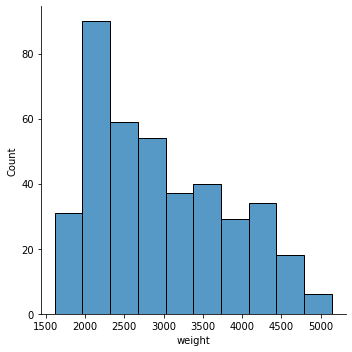

In [ ]:
sns.displot(data['displacement'])
sns.displot(data['mpg'])
sns.displot(data['acceleration'])
sns.displot(data['cylinders'])
sns.displot(data['horsepower'])
sns.displot(data['weight'])     #ploting the graph of the given data

In [ ]:
data.shape  #It prints the dimensions of the dataset

(398, 9)

In [ ]:
data.columns   #It prints the names of the columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [ ]:
data['car name'].value_counts()

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: car name, Length: 305, dtype: int64

In [ ]:
data['car name'].unique()  #list of all car names

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [ ]:
data.info()  #It shows the different datatype used in Automobile MPG prediction 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


**Graph(Histrogram/Bar graph)**

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(data, nGraphShown, nGraphPerRow):
    nunique = data.nunique()
    df = data[[col for col in data if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = data.shape
    columnNames = list(data)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = data.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(data, graphWidth):
    filename = data.dataframeName
    df = data.dropna('columns') # drop columns with NaN
    df = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if data.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({data.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(data, plotSize, textSize):
    df = data.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = data.dropna('columns')
    df = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(data)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(data, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = data.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
data.dataframeName = 'auto-mpg.csv'
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 398 rows and 9 columns


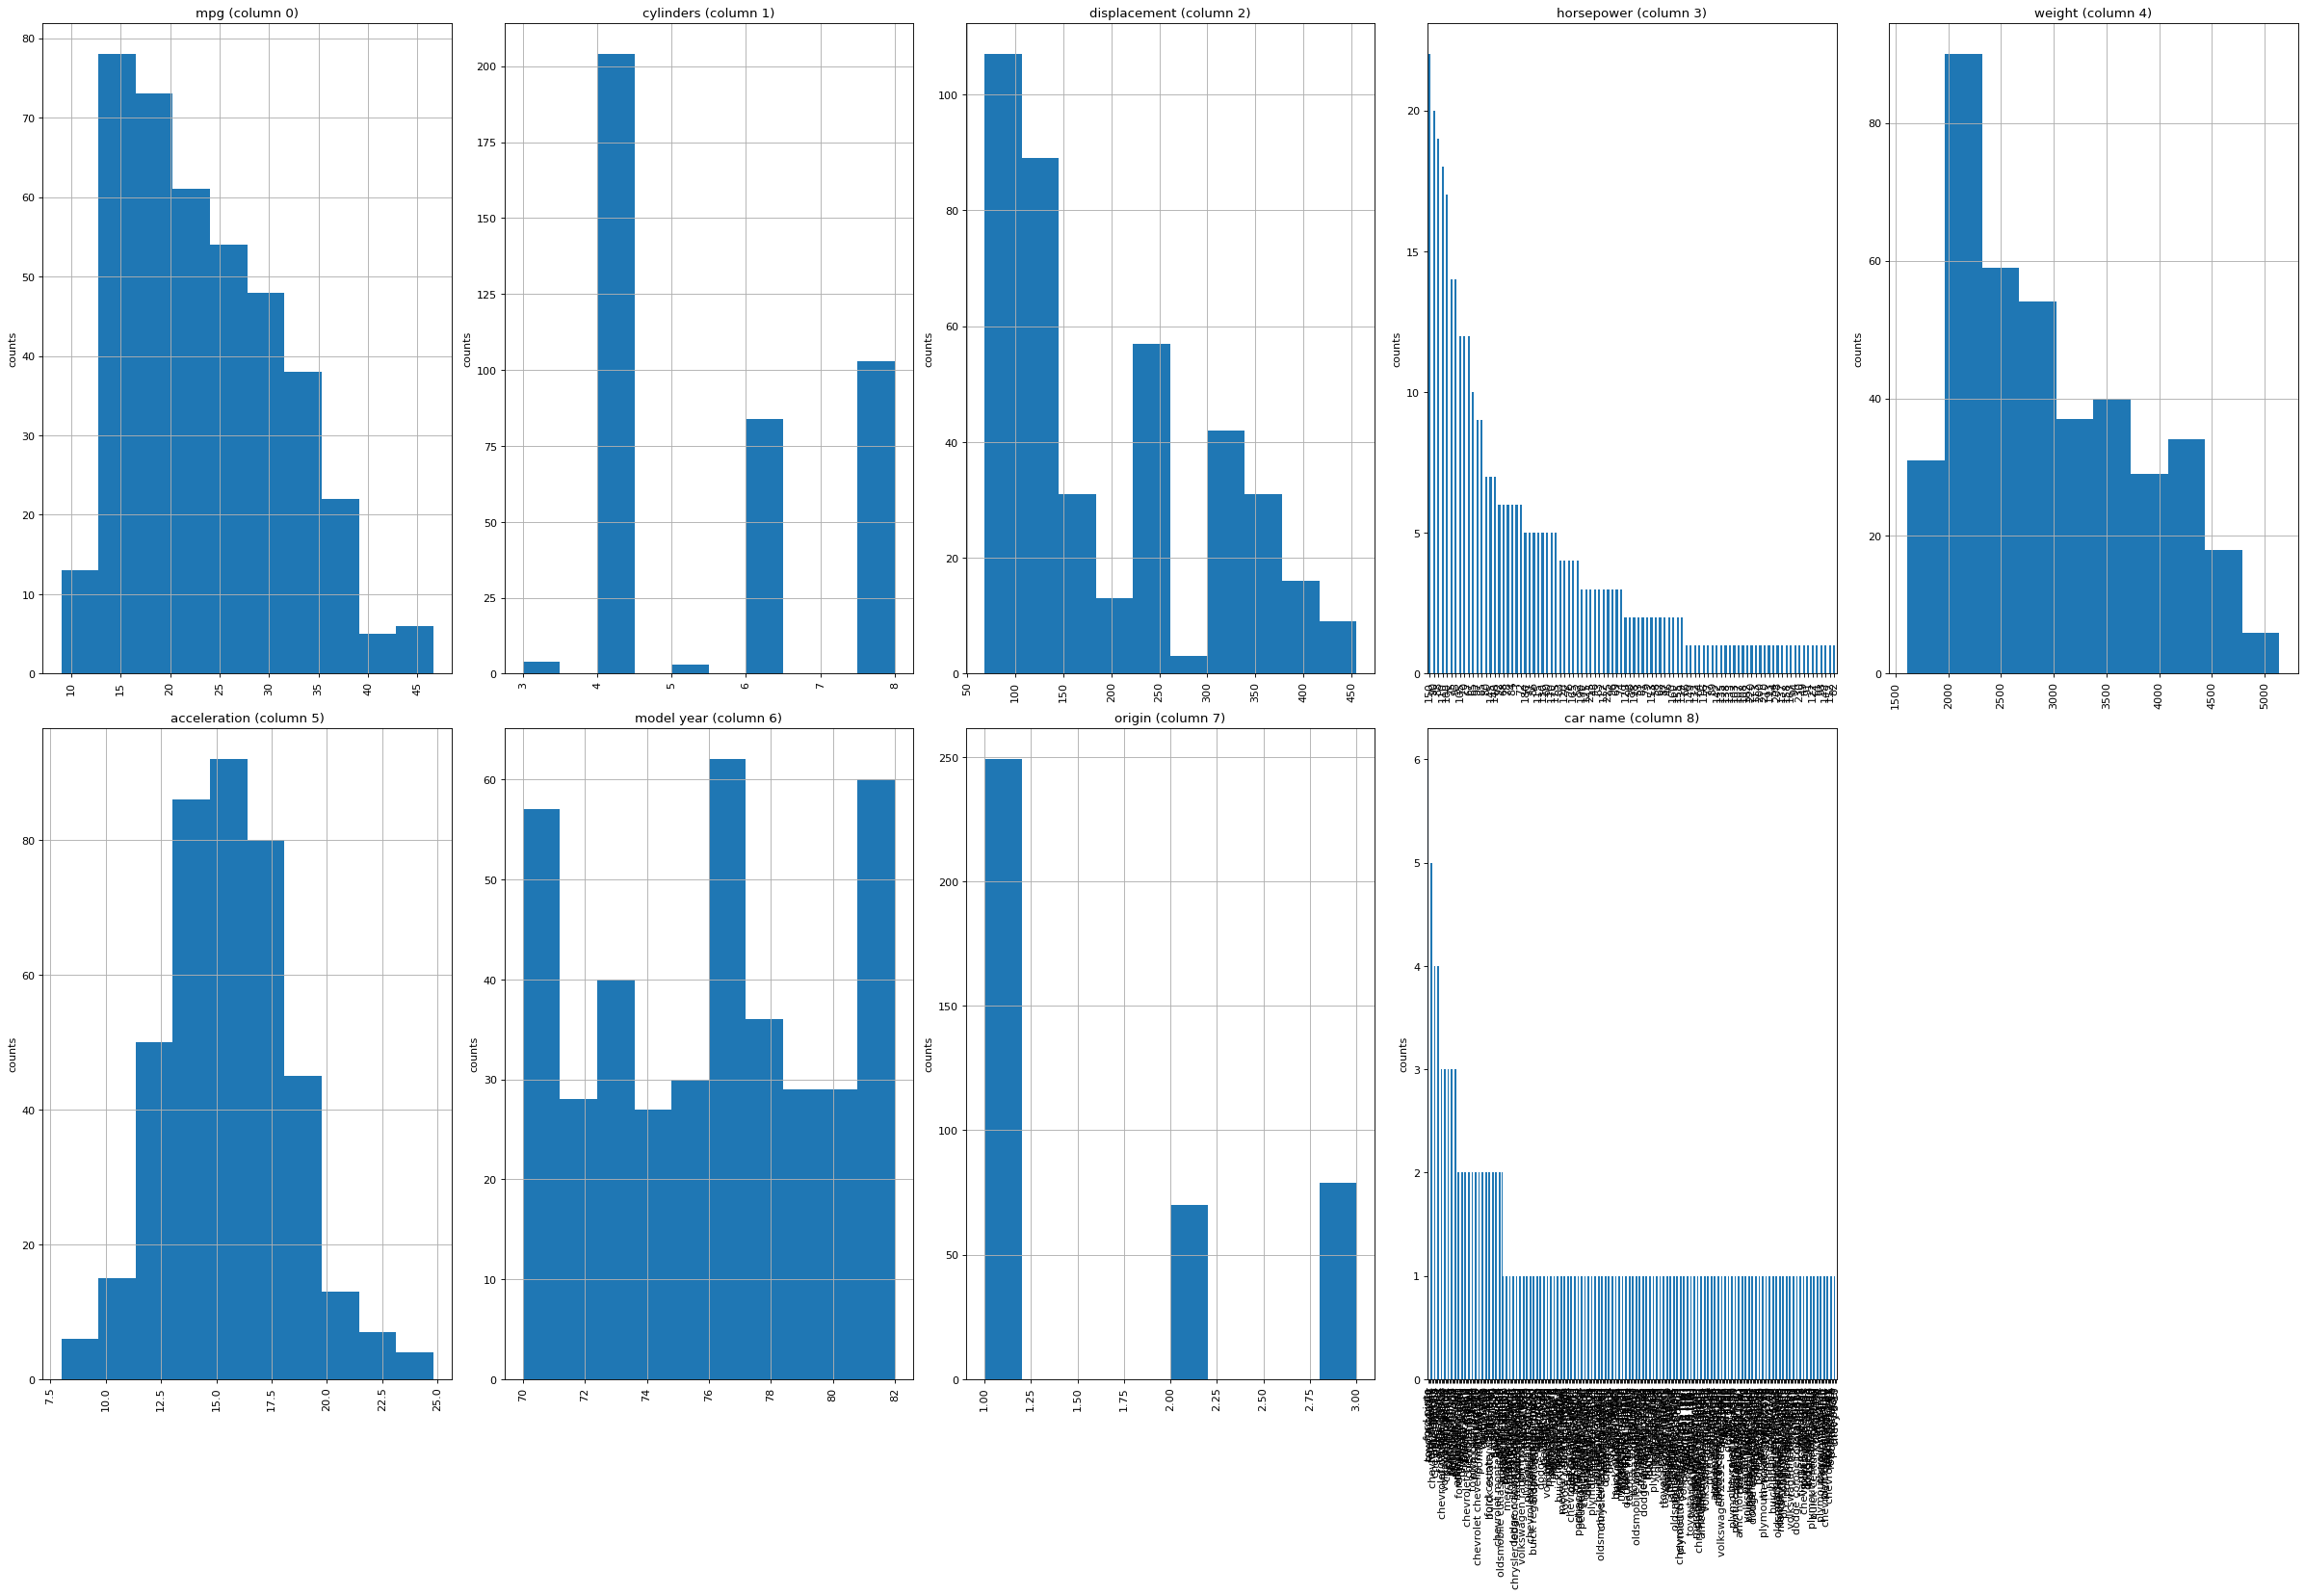

In [ ]:
plotPerColumnDistribution(data, 10, 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


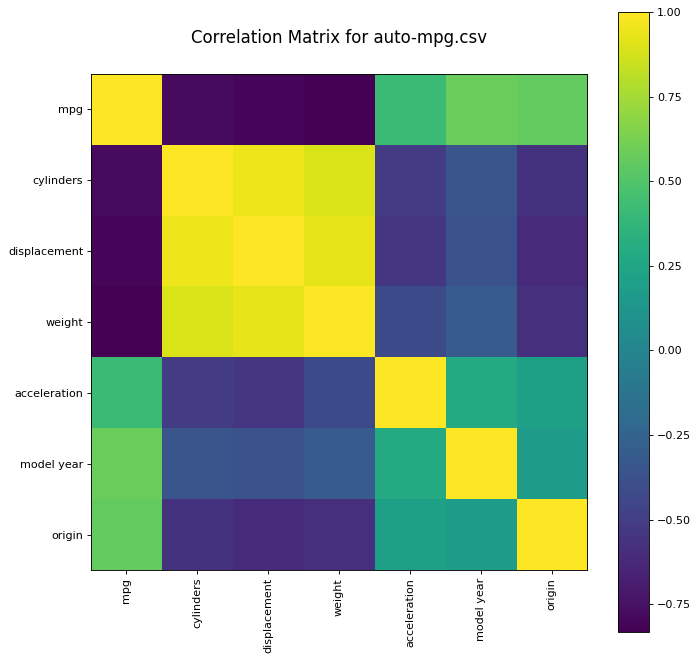

In [ ]:
plotCorrelationMatrix(data, 10)
#A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.
#A correlation matrix consists of rows and columns that show the variables. Each cell in a table contains the correlation coefficient.

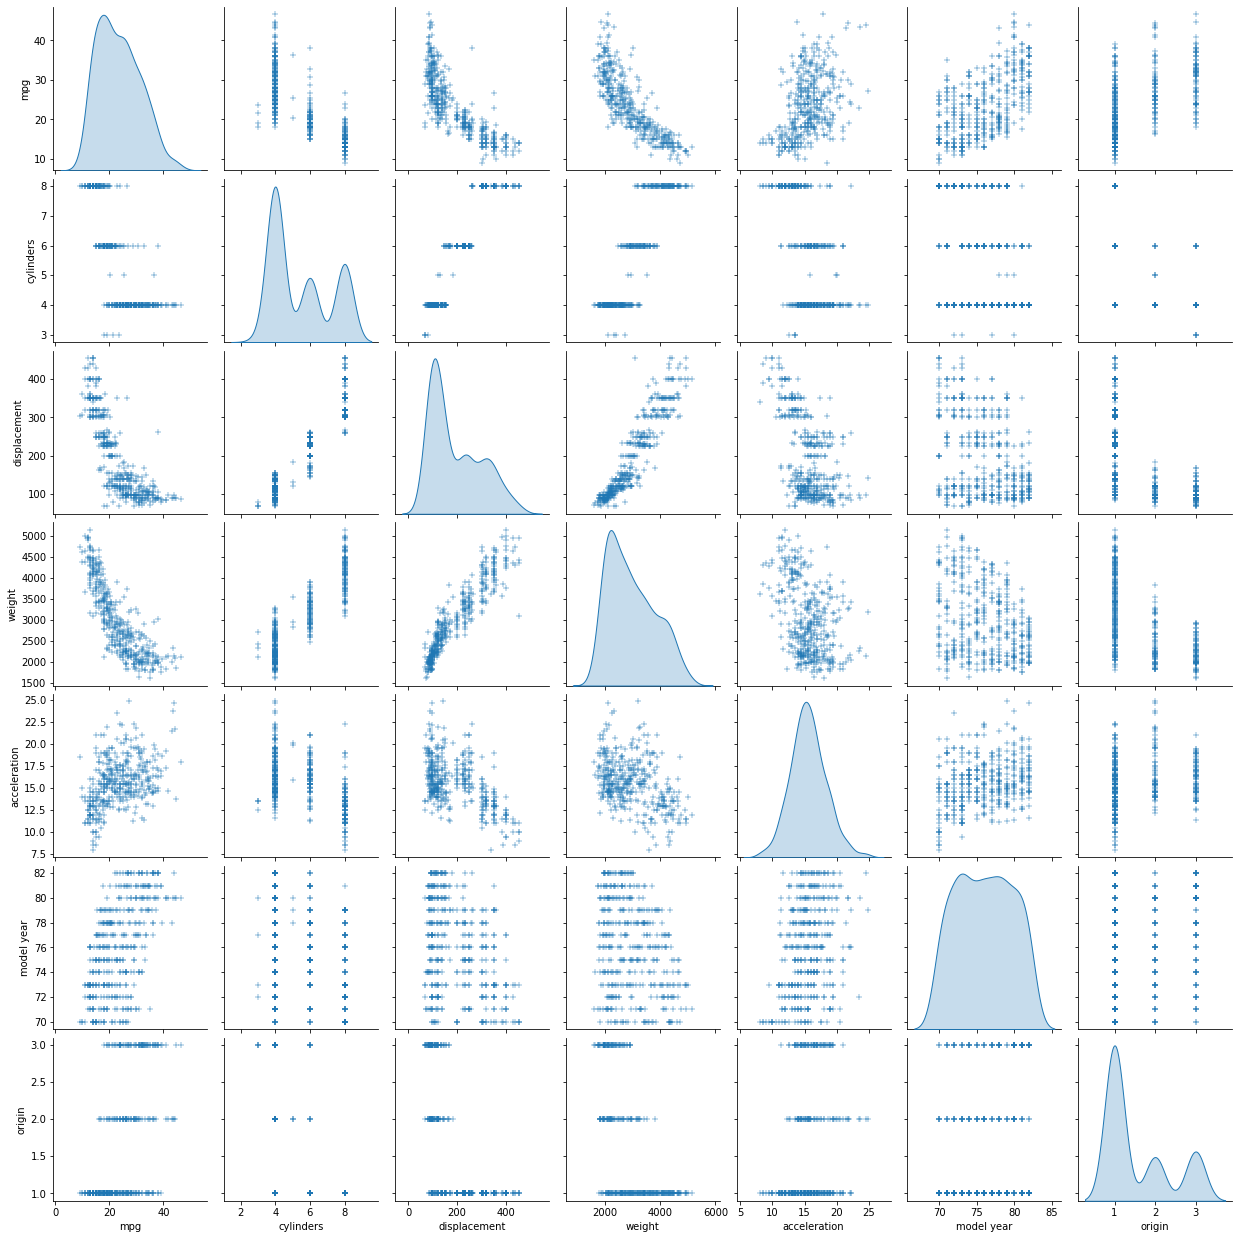

In [ ]:
sns.pairplot(data, diag_kind = "kde", markers = '+') # we are ploting the dependent and independent and comparing it
plt.show()


#  Preprocessing

In [ ]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Fill in missing horsepower values with the column mean
    df['horsepower'] = df['horsepower'].replace('?', np.NaN).astype(np.float)
    df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
    
    # Create make feature
    df['make'] = df['car name'].apply(lambda x: re.search(r'^\w+', x).group(0))
    df = df.drop('car name', axis=1)
    
    # Fix typos in make names
    make_typo_correction = {
        'vw': 'volkswagen',
        'chevy': 'chevrolet',
        'maxda': 'mazda',
        'vokswagen': 'volkswagen',
        'toyouta': 'toyota',
        'chevroelt': 'chevrolet'
    }
    df['make'] = df['make'].replace(make_typo_correction)
    
    # One-hot encode nominal features
    nominal_feature_dict = {
        'origin': 'orig',
        'make': 'mk'
    }
    df = onehot_encode(df, nominal_feature_dict)
    
    # Split df into X and y
    y = df['mpg'].copy()
    X = df.drop('mpg', axis=1).copy()
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    # Scale X_train and X_test with a standard scaler fit only on X_train
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [ ]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,orig_1,orig_2,orig_3,mk_amc,...,mk_peugeot,mk_plymouth,mk_pontiac,mk_renault,mk_saab,mk_subaru,mk_toyota,mk_triumph,mk_volkswagen,mk_volvo
0,1.497785,1.620399,1.711111,1.968967,-0.958513,-0.827971,0.761279,-0.427760,-0.519044,-0.255214,...,-0.120824,3.591657,-0.212398,-0.104447,-0.104447,-0.104447,-0.278423,0.0,-0.230283,-0.135333
1,1.497785,2.288862,2.446571,1.601619,-2.072349,-1.640357,0.761279,-0.427760,-0.519044,-0.255214,...,-0.120824,-0.278423,-0.212398,-0.104447,-0.104447,-0.104447,-0.278423,0.0,-0.230283,-0.135333
2,-0.844742,-0.714375,-0.337673,-0.636509,-0.215956,1.067595,-1.313579,-0.427760,1.926620,-0.255214,...,-0.120824,-0.278423,-0.212398,-0.104447,-0.104447,-0.104447,-0.278423,0.0,-0.230283,-0.135333
3,0.326521,0.312538,0.135123,0.755426,1.157775,0.526005,0.761279,-0.427760,-0.519044,-0.255214,...,-0.120824,-0.278423,-0.212398,-0.104447,-0.104447,-0.104447,-0.278423,0.0,-0.230283,-0.135333
4,-0.844742,-0.927508,-1.545930,-1.339518,1.826077,-1.640357,-1.313579,2.337759,-0.519044,-0.255214,...,-0.120824,-0.278423,-0.212398,-0.104447,-0.104447,-0.104447,-0.278423,0.0,4.342481,-0.135333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,1.497785,1.523521,1.711111,1.395058,-1.552559,0.255210,0.761279,-0.427760,-0.519044,-0.255214,...,-0.120824,-0.278423,-0.212398,-0.104447,-0.104447,-0.104447,-0.278423,0.0,-0.230283,-0.135333
274,0.326521,0.554735,-0.127541,0.354042,0.897880,-0.827971,0.761279,-0.427760,-0.519044,-0.255214,...,-0.120824,-0.278423,-0.212398,-0.104447,-0.104447,-0.104447,-0.278423,0.0,-0.230283,-0.135333
275,-0.844742,-1.034075,-1.046867,-1.016767,0.860752,1.067595,-1.313579,-0.427760,1.926620,-0.255214,...,-0.120824,-0.278423,-0.212398,-0.104447,-0.104447,-0.104447,-0.278423,0.0,-0.230283,-0.135333
276,-0.844742,-0.820942,-0.915535,-0.858326,0.489473,1.609186,-1.313579,-0.427760,1.926620,-0.255214,...,-0.120824,-0.278423,-0.212398,-0.104447,-0.104447,-0.104447,3.591657,0.0,-0.230283,-0.135333


# **Training**

# Linear Regression:

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.8586687550293909

In [ ]:
Reg_predict =reg.predict(X_test)
Reg_predict

array([ 2.54964909e+01,  7.60818522e+00,  2.00232415e+01,  3.15014691e+01,
        3.44929241e+01,  2.19966893e+01,  3.12330632e+01,  2.68298497e+01,
        3.41431927e+01,  1.13667607e+01,  3.01082806e+01,  3.21266026e+01,
        2.72901158e+01,  1.90318760e+01,  1.94674992e+01,  2.24017491e+01,
        1.53307041e+01,  2.44913029e+01,  1.28892979e+01,  1.11375279e+01,
        3.68105625e+01,  2.08684391e+01,  2.88575138e+01,  3.06169476e+01,
        1.94839024e+01,  1.75589451e+01,  1.43474278e+01,  6.19014792e+11,
        3.13597454e+01,  2.91575779e+01,  2.68316197e+01,  2.14546055e+01,
        2.46498875e+01,  1.50873875e+01,  2.70977940e+01,  2.71406254e+01,
        2.70771488e+01,  3.71553044e+01,  1.40005039e+01,  3.05769352e+01,
        1.80511784e+01,  3.42863011e+01,  2.74549565e+01,  2.89824375e+01,
        3.00333561e+01,  1.67537693e+01,  1.17051853e+01,  2.49832615e+01,
        3.00262150e+01,  3.16144261e+01,  8.73864787e+00,  3.49374699e+01,
        2.96698918e+01,  

**check Mean Squared Error for Linear Regression**

In [ ]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, Reg_predict)

4.2899011618542484e+21

In [ ]:
np.sqrt(mean_squared_error(y_test, Reg_predict))

65497337059.25951

# Decision tree model

In [ ]:
# Using a decision tree model
tree_model = DecisionTreeRegressor()
Dec=tree_model.fit(X_train, y_train)
A=Dec.score(X_train, y_train)
print(A)
dec_predict =tree_model.predict(X_test.values)
print(dec_predict)
tree_r2 = tree_model.score(X_test, y_test)
print("Decision Tree R^2: {:.5f}".format(tree_r2))

1.0
[28.  12.  20.  26.  31.5 19.2 31.  30.  32.2 13.  31.  34.7 19.9 18.
 13.  17.  17.5 18.  15.  13.  32.  15.5 31.  29.  18.  18.  18.  31.3
 29.  25.  23.8 18.  26.4 15.5 24.3 29.  23.5 37.2 15.  34.3 16.  37.7
 34.5 34.5 28.  17.  16.  24.  29.  43.1 10.  29.  30.9 26.4 33.7 18.
 15.  24.5 15.5 22.  24.  25.  26.  37.2 25.8 24.  18.6 34.4 19.2 30.9
 13.  22.  20.  27.  17.  28.  17.5 20.8 18.  15.  15.5 31.  11.  32.
 24.2 33.  18.  23.2 12.  25.  17.  18.2 24.  30.  17.  17.  24.  31.8
 13.  38.1 13.  15.5 24.  17.  18.  16.  29.5 21.  16.9 25.  19.4 19.
 15.5 29.  15.  30.  15.5 19.4 28.  38.1]
Decision Tree R^2: 0.76436


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


check mean square error using decision tree model

In [ ]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, dec_predict)


13.030416666666667

In [ ]:
np.sqrt(mean_squared_error(y_test,dec_predict))

3.609766843809537

# Random forest regression model

In [ ]:
# Using random forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

rf_r2 = rf_model.score(X_test, y_test)
print("Random Forest R^2: {:.5f}".format(rf_r2))

Random Forest R^2: 0.82882


In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
data = []  # initialize a array to store the trained data 
Random_Forest = RandomForestRegressor() #creating the instances of RandomForest Regressor
Random_Forest.fit(X_train.values,y_train.values)# it will train the model. Which can be used in predict() with a single arguement

RandomForestRegressor()

In [ ]:
y_predict = Random_Forest.predict(X_test.values)
#y_predict = Random_Forest.predict(X_test)


In [ ]:
y_predict

array([24.666, 12.46 , 20.96 , 29.343, 36.651, 19.009, 30.168, 28.761,
       33.876, 13.215, 28.421, 35.445, 20.694, 19.821, 17.59 , 20.374,
       15.456, 21.437, 14.27 , 14.335, 37.611, 16.317, 27.795, 30.613,
       18.95 , 17.9  , 16.381, 30.912, 29.998, 25.138, 23.649, 19.01 ,
       25.741, 15.073, 27.41 , 29.47 , 24.328, 37.272, 14.28 , 33.741,
       16.175, 38.124, 31.196, 35.913, 27.94 , 17.775, 14.799, 23.522,
       27.981, 37.264, 12.065, 30.459, 27.812, 27.25 , 33.419, 19.834,
       16.482, 24.959, 15.538, 22.168, 24.822, 22.984, 28.053, 36.399,
       29.105, 23.834, 18.841, 32.261, 18.885, 26.121, 14.59 , 19.323,
       24.67 , 27.936, 18.86 , 28.469, 17.663, 20.286, 16.757, 17.747,
       15.395, 29.882, 13.6  , 31.714, 25.304, 32.105, 17.959, 23.91 ,
       12.32 , 24.292, 17.059, 18.305, 24.765, 30.886, 15.992, 16.534,
       23.067, 33.92 , 13.485, 36.384, 17.799, 15.309, 22.879, 14.755,
       19.1  , 15.033, 29.083, 23.142, 16.87 , 23.366, 18.047, 19.103,
      

Checking Mean Squared Error for Random Forest Regressor

In [ ]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, y_predict)

9.220331666666652

In [ ]:
np.sqrt(mean_squared_error(y_test, y_predict))

3.0364999039464258

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
n=int(input("Enter the degree"))
poly = PolynomialFeatures(degree=n, include_bias=False)
#poly_features = poly.fit_transform(x_train.values.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

Enter the degree5


LinearRegression()

In [ ]:
poly_predict= reg.predict(X_test)
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, poly_predict)

4.2899011618542484e+21

In [ ]:
np.sqrt(mean_squared_error(y_test, poly_predict))

65497337059.25951

References:
https://www.analyticsvidhya.com/blog/2022/01/different-types-of-regression-models/

https://groverjatin.medium.com/predict-car-gas-mileage-machine-learning-regression-prediction-problem-675869517617
https://cocolevio.com/how-to-predict-car-fuel-efficiency-using-machine-learning/

#defining the model
model1 = data[[' cylinders ']]
model2 = data[['weight']]
model3 = data[['model year']]
model4 = data[['origin']]
model5 = data[['displacement']]
model6 = data[['acceleration']]
model7 = data[['cylinders','acceleration']]
model8 = data[['cylinders','displacement']]
model9 = data[['displacement','origin','cylinders']]
model10 = data[['acceleration','origin','weight']]
model11= data[['acceleration','origin','cylinders','displacement']]
#The output that the user get input from our dataset
actual_mpg = data['mpg']

In [ ]:
#importing libraries for the model
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.linear_model import LinearRegression

# Prediction using cylinders

In [ ]:
model1 =data[['cylinders']]
x_train,x_test,y_train,y_test = train_test_split(model1,actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

# Prediction using Weight

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model2,actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

NameError: ignored

# Prediction using model year

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model3,actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

# Prediction using origin

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model4,actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

# Prediction using displacement

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model5,actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

# Prediction using Acceleration

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model6,actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

# Prediction using cylinders and acceleration

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model7,actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

# prediction using cylinders and displacement

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model8,actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

# prediction using cylinders,origin and displacement

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model9,actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

# Prediction using Acceleration,origin,weight

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model10 ,actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

# Prediction using Acceleration,origin,diaplacement and cylinders

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model11 ,actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))